### **Iris Project**
#### Xuyang Chen
##### 2025 Summer

### Introduction
The Iris dataset, first introduced by the British statistician and biologist **Ronald A. Fisher (1936)**, is one of the most widely used benchmark datasets in statistics, machine learning, and pattern recognition. It contains 150 observations of iris flowers, equally divided among three species: _Iris-setosa_, _Iris-versicolor_, and _Iris-virginica_. Each observation is described by four numerical features: sepal length, sepal width, petal length, and petal width.

In this project, I will explore the Iris dataset using **Python** through:

- **Basic Data Analysis** – calculating summary statistics (mean, variance, correlation) and visualizing feature distributions.

- **Data Visualization** – using histograms and pairwise comparisons to identify relationships between features.

- **Principal Component Analysis (PCA)** – applying linear algebra techniques to reduce the dataset from four dimensions to two, while retaining as much variance as possible. This provides insight into how PCA can uncover hidden structure and simplify data visualization.

### Data Description
The dataset contains 150 observations and 5 variables related to iris flowers. It includes numeric measurements of flower characteristics (such as sepal and petal dimensions) and a categorical variable representing the species. This dataset is commonly used in machine learning for classification tasks.

- SepalLengthCm (Float/Double, numeric) – The length of the iris flower’s sepal, measured in centimeters.
- SepalWidthCm (Float/Double, numeric) – The width of the iris flower’s sepal, measured in centimeters.
- PetalLengthCm (Float/Double, numeric) – The length of the iris flower’s petal, measured in centimeters.
- PetalWidthCm (Float/Double, numeric) – The width of the iris flower’s petal, measured in centimeters.
- Species (Character, categorical) – The type of iris flower. It has three possible classes: *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica*.

### Reference:

- Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x 

- Kaggle Dataset: https://www.kaggle.com/datasets/uciml/iris

### Exploratory Data Analysis (EDA) and Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# General info
df.info()

# Summary statistics
df.describe()

# Determine number of species
df['Species'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Visualizations

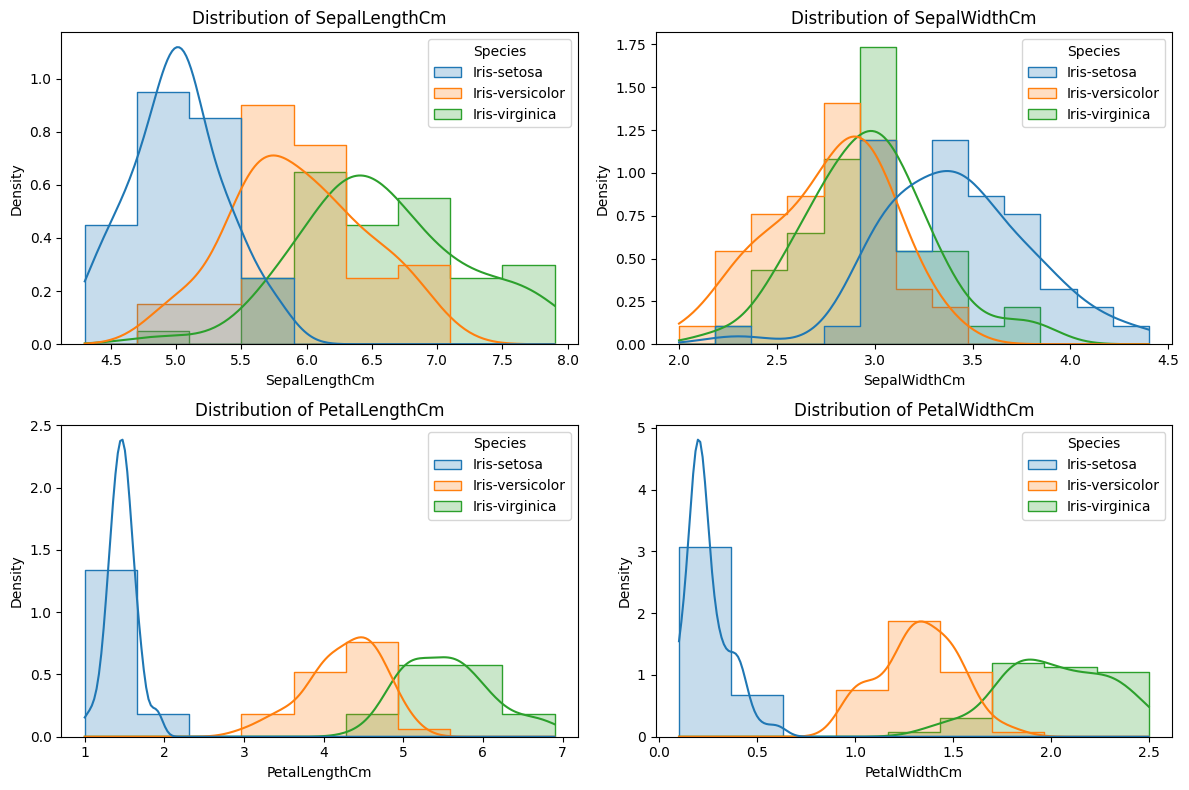

In [4]:
# Overlaying histograms by species for each feature

features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        data=df, 
        x=feature, 
        hue="Species",     # overlay by species
        kde=True,          # smooth density curve
        element="step",    # avoids stacking bars
        stat="density",    # makes areas comparable
        common_norm=False  # allow separate scaling per species
    )
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

`Petal length` and `petal width` are the most discriminative variables: *Iris-setosa* shows distinctly small petals, with very little overlap with the other species. *Iris-versicolor* and *Iris-virginica* exhibit larger petal sizes, but *Iris-virginica* generally occupies the higher ranges, especially for petal length.

`Sepal length` shows moderate separation among species. *Iris-setosa* tends to cluster in the lower range of sepal lengths, while *Iris-virginica* generally occupies the higher range. *Iris-versicolor* lies in between, but overlaps with both other groups.

`Sepal width`, in contrast, provides the least separation among species. Although *Iris-setosa* has slightly higher average sepal width values compared to the others, the distributions of *Iris-versicolor* and *Iris-virginica* overlap heavily. This suggests that sepal width alone is not sufficient for species identification but may still provide supporting information when combined with other features.

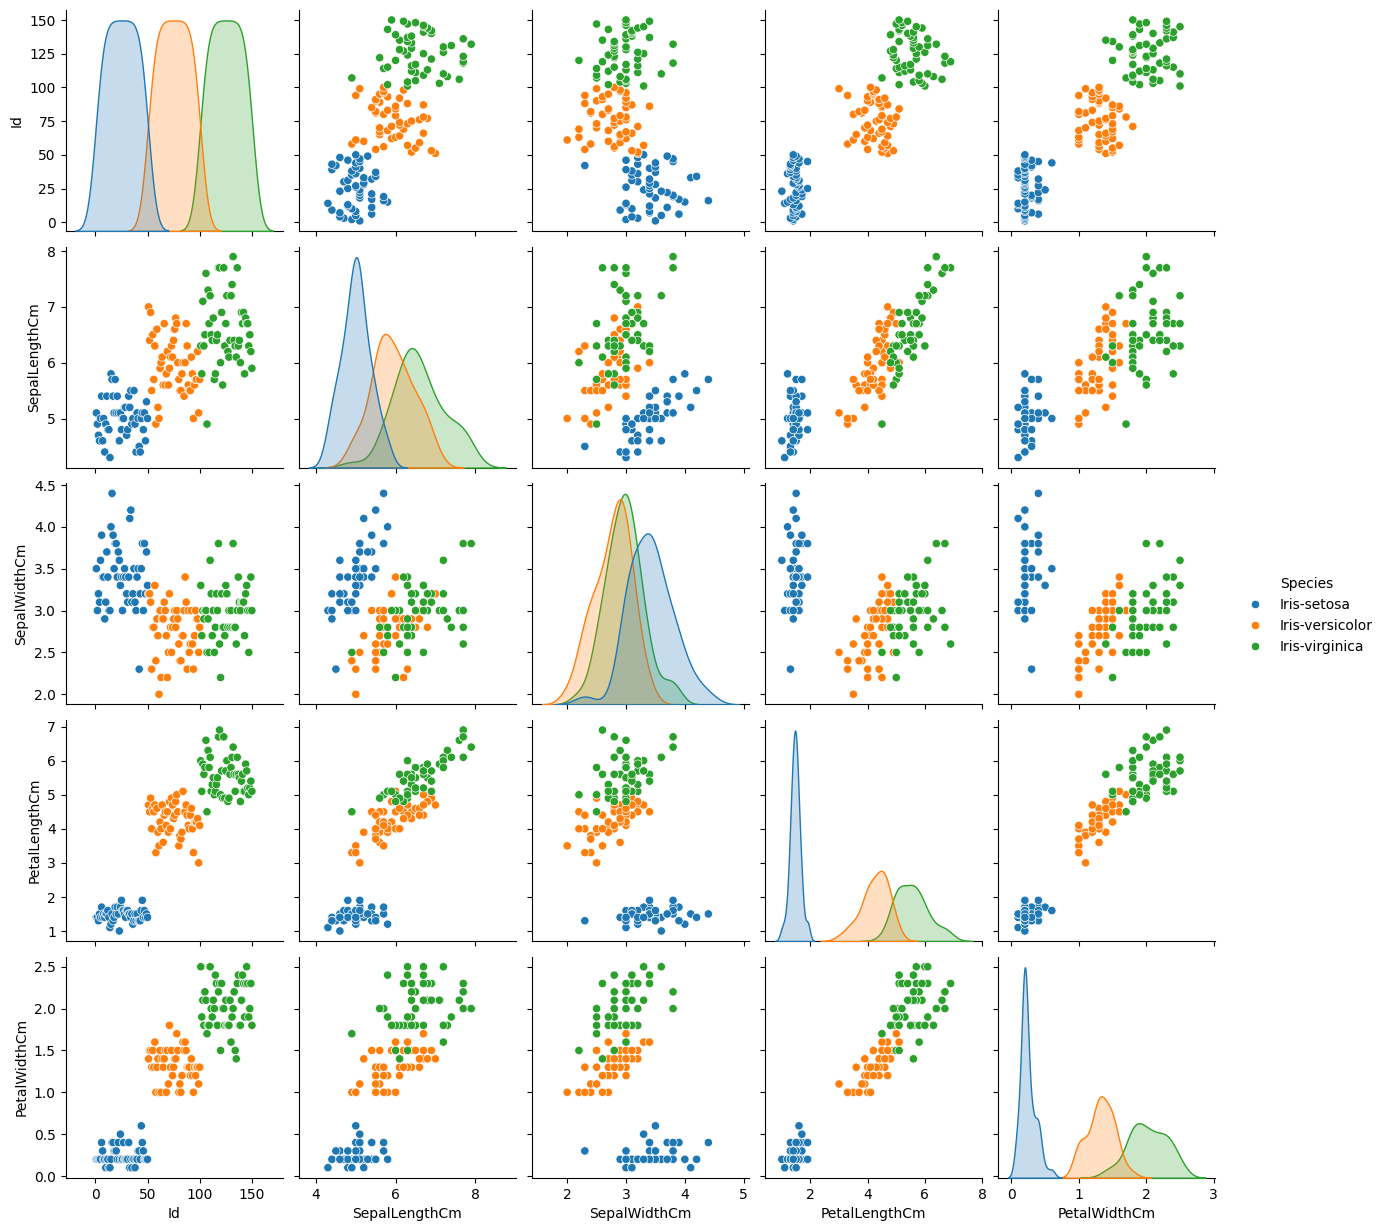

In [5]:
# Pairplot to see relationships
sns.pairplot(df, hue="Species", diag_kind="kde")
plt.show()


The pairplot reveals clear patterns that help explain how the three Iris species are separated by their measured characteristics. The **petal measurements (PetalLengthCm and PetalWidthCm)** provide the strongest separation. *Iris-setosa* (blue) clusters tightly with very small petals, distinct from both *Iris-versicolor* (orange) and *Iris-virginica* (green). Meanwhile, *Iris-versicolor* and *Iris-virginica* overlap somewhat, but *Iris-virginica* generally has larger petals, making these features particularly effective in distinguishing species.

When examining **sepal measurements (SepalLengthCm and SepalWidthCm)**, the separation is less pronounced. *Iris-setosa* tends to have smaller sepal length and relatively larger sepal width compared to the other two species, creating some separation. However, *Iris-versicolor* and *Iris-virginica* overlap significantly in these dimensions, indicating that sepal features alone are insufficient for species classification.

The diagonal distributions further confirm these trends. Petal length and petal width histograms show distinct clusters with minimal overlap, while sepal length and width distributions overlap extensively, especially between *Iris-versicolor* and *Iris-virginica*

### Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a method used to simplify complex datasets while keeping as much useful information as possible. It works by combining the original features into new variables, called principal components, that capture the main patterns in the data. By reducing the number of dimensions, PCA makes it easier to visualize and understand differences between groups. In the Iris dataset, PCA helps us see how the three species can be separated more clearly in just two dimensions.

#### PCA on the full dataset

Explained variance ratio: [0.72770452 0.23030523]


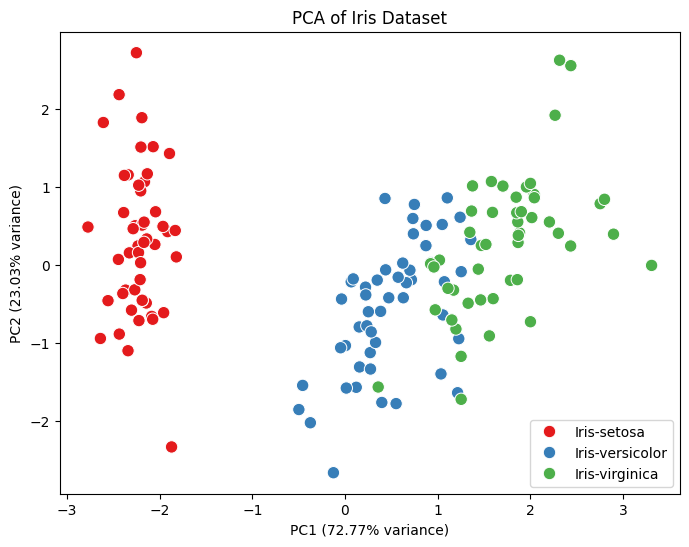

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop non-numeric columns
X = df.drop(columns=["Id", "Species"])

# Standardize the features (important for PCA!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(
    X_pca, 
    columns=["PC1", "PC2"]
)
pca_df["Species"] = df["Species"]

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot of PCA results
plt.figure(figsize = (8, 6))
sns.scatterplot(
    x = "PC1", y = "PC2",
    hue = "Species",
    data = pca_df,
    palette = "Set1",
    s = 80
)
plt.title("PCA of Iris Dataset")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend()
plt.show()

In [7]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72770452 0.23030523]


The PCA plot of the Iris dataset shows how the three species — *Iris-setosa*, *Iris-versicolor*, and *Iris-virginica* — are distributed in the space of the first two principal components.

The first principal component (PC1), which explains 72.77% of the variance, captures most of the differences in flower measurements. Along this axis, *Iris-setosa* is clearly separated from the other two species, forming a distinct cluster on the left. This indicates that *Iris-setosa* has unique characteristics compared to the other species. On the other hand, *Iris-versicolor* and *Iris-virginica* overlap partially, though they still show some separation along both PC1 and the second principal component (PC2).

The second principal component (PC2), accounting for 23.03% of the variance, adds additional separation, especially between *Iris-versicolor* and *Iris-virginica*. However, the overlap suggests that these two species share more similarities in their flower dimensions compared to *Iris-setosa*.

Overall, the PCA confirms that the dataset is well-structured: one species (*Iris-setosa*) is highly distinguishable, while the other two (*Iris-versicolor* and *Iris-virginica*) are somewhat harder to separate but still show distinct patterns.

#### PCA for each species


--- PCA for Iris-setosa ---
Explained variance ratio: [0.51869524 0.24655851]


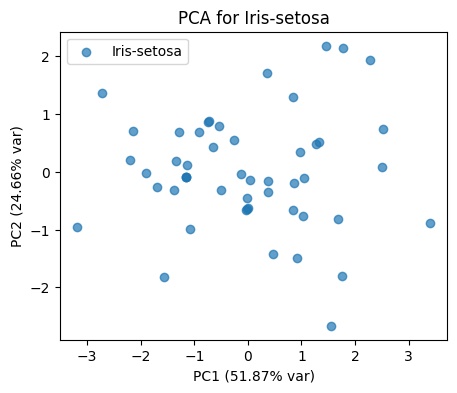


--- PCA for Iris-versicolor ---
Explained variance ratio: [0.73158517 0.13656866]


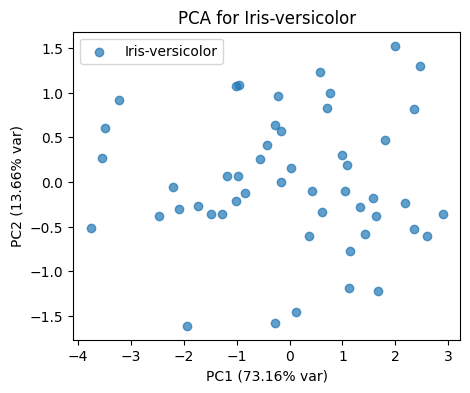


--- PCA for Iris-virginica ---
Explained variance ratio: [0.61368429 0.24117816]


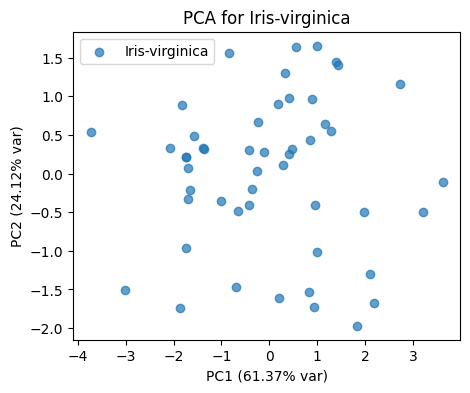

In [8]:
species_list = df["Species"].unique()

for species in species_list:
    print(f"\n--- PCA for {species} ---")
    
    # Subset data for one species
    X_species = df[df["Species"] == species].drop(columns = ["Id", "Species"])
    
    # Standardize
    X_scaled = StandardScaler().fit_transform(X_species)
    
    # PCA
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X_scaled)
    
    # Explained variance
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    
    # Scatter plot (just one cluster per species)
    plt.figure(figsize=(5,4))
    plt.scatter(X_pca[:,0], X_pca[:,1], label = species, alpha = 0.7)
    plt.title(f"PCA for {species}")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% var)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% var)")
    plt.legend()
    plt.show()

In addition to applying PCA on the full dataset, species-specific PCA plots were also generated. While the variance explained within each species is relatively low, these plots are useful for demonstrating the internal homogeneity of each group. They show that within a single species, the features are highly consistent, leaving little room for dimensionality reduction to separate sub-groups. This contrast reinforces the value of applying PCA to the entire dataset, where the method becomes more meaningful in distinguishing between species rather than within them. Thus, the species-specific PCA serves as a complementary analysis that highlights why inter-species comparisons provide greater insights.

**Iris-setosa**

For *Iris-setosa*, the PCA plot shows a fairly even spread of points without strong clustering along the first two components. PC1 explains 51.87% of the variance, and PC2 explains 24.66%. This indicates that the main sources of variability in this species are more evenly distributed across multiple dimensions, so there's less pronounced internal differentiation. The data appears well-dispersed, *Iris-setosa* is relatively homogeneous compared to the other species.

**Iris-versicolor**

For *Iris-versicolor*, PC1 captures a much larger portion of the variance (73.16%), while PC2 contributes only 13.66%. This suggests that most of the variability within this species can be described along a single dominant axis (PC1). The spread of points shows some variation, but the structure is largely captured by PC1. Thus, one feature or combination of features is primarily responsible for differences among *Iris-versicolor* samples.

**Iris-virginica**
For *Iris-virginica*, PC1 accounts for 61.37% of the variance and PC2 for 24.12%. This distribution suggests that variability within this species is captured well by the first two principal components, with PC1 being dominant but PC2 still significant. Compared to *Iris-versicolor*, *Iris-virginica* shows a broader spread across both axes, which means there's greater internal diversity in its measurements.

### Conclusion

When comparing the species-specific PCA plots to the whole-dataset PCA, some important differences emerge. In the combined PCA, the three Iris species are clearly distinguishable along the first two components, with *Iris-setosa* forming a distinct cluster and *Iris-versicolor* and *Iris-virginica* showing some overlap. This reflects how PCA helps uncover broad inter-species variation. 

However, when PCA is performed separately for each species, the results highlight the internal variability within each group. *Iris-setosa* demonstrates relatively even variance across the first two components, consistent with its well-documented homogeneity. In contrast, *Iris-versicolor*’s variation is largely captured by a single principal component, suggesting a more uniform structure with one dominant axis of differentiation. *Iris-virginica* displays substantial variance across both PC1 and PC2, indicating greater within-species diversity. 

Overall, PCA proved to be a valuable tool in this case by providing complementary perspectives: 
- highlighted between-species separation when applied to the full dataset 
- revealed within-species variability when applied individually. 